In [1]:
import os 
import shutil 
import sys
import glob 
import time

import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import torch.optim as optim 
import torchvision.models as models 

from tabulate import tabulate 
from torch import nn
from PIL import Image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.io import decode_image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

from torchvision.models import resnet18, ResNet18_Weights
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models import vgg13, VGG13_Weights

# SUBMIT ID
2k_dataset: 	274480 \
10k_dataset:    274481

In [2]:
# PARAMETERS 
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
LEARNING_RATE = 5e-4 
BATCH_SIZE = 128
NUM_EPOCHS = 30
NUM_WORKERS = os.cpu_count()
IMAGE_SIZE = (224, 224)
print(f"Device: {DEVICE}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Workers: {NUM_WORKERS}")

Device: cuda
Batch size: 128
Workers: 4


In [3]:
repo_list = """
https://github.com/GwLewis369/Hand-written-digit-classification-data.git
https://github.com/gbaonr/CS114_handwritten_digits_data
https://github.com/adamwhite625/CS114_hand_written_digit.git
https://github.com/theRaven1312/CS114.P21
https://github.com/Khoiisme1905/CS114.git
https://github.com/ProjectHT1/machinelearning
https://github.com/Searching96/hand-written-digit.git
https://github.com/Salmon1605/CS114
https://github.com/anhtuann1224/hand_written_digit
https://github.com/NATuanAN/Hand_written_digit_classification_data.git
https://github.com/huapogba/may-hoc
https://github.com/hieutran890j2/CS114.git
https://github.com/votanhoang483/CS114.P21-Hand_written_digit_classification
https://github.com/DHPh/CS114_hand_written_digit/
https://github.com/thaituanUIT/ReminiScenceAI
https://github.com/anngyn/CS114-Hand-Written-Digit
https://github.com/lngphgthao/cs114-hand-written-digit-classification/tree/main/hand_written_digit
https://github.com/Toan02Ky-UIT/CS114
https://github.com/Lochke/CS114_Handwritten_Digit_Classification.git
https://github.com/NThong325/CS114/tree/cfd654a14dd471f5272387139d586ddcbf9cdf7e/hand_written_digit
https://github.com/toanlamdata/digit-recognition-group
https://github.com/Nohenshin/CS114.P21-2025-
https://github.com/hmcslearning/ML1142025
https://github.com/lngphgthao/cs114-hand-written-digit-classification
https://github.com/huapogba/may-hoc
https://github.com/NThong325/CS114/tree/main/hand_written_digit
https://github.com/23520276/Hand-written-digit-classification/
https://github.com/NThong325/CS114

"""

In [4]:
os.getcwd()

'/kaggle/working'

In [5]:
os.mkdir('CS114_hand_written_digits')

In [6]:
os.mkdir('Dataset')

In [7]:
cd Dataset

/kaggle/working/Dataset


In [8]:
for i in range(10):
    os.mkdir(f'{i}')

In [9]:
ls

0/  1/  2/  3/  4/  5/  6/  7/  8/  9/


In [10]:
os.getcwd()

'/kaggle/working/Dataset'

In [11]:
cd .. 

/kaggle/working


In [12]:
cd CS114_hand_written_digits

/kaggle/working/CS114_hand_written_digits


In [13]:
data_dir = os.getcwd()
print(data_dir)

/kaggle/working/CS114_hand_written_digits


In [14]:
!git config --global core.compression 0
!rm -rf data_dir/*

In [15]:
for i in repo_list.strip().split():
    dir_name = !bash -c """echo {i} | sed -E 's|https://github.com/([^/]+)/([^/]+)(\.git)?|\1_\2|'"""
    dir_name = dir_name[0]
    print(f"Cloning into {dir_name} ...")
    !git clone {i} /tmp/{dir_name} || rm -rf /tmp/{dir_name}
    !mv /tmp/{dir_name} {data_dir}/{dir_name}

Cloning into GwLewis369_Hand-written-digit-classification-data.git ...
Cloning into '/tmp/GwLewis369_Hand-written-digit-classification-data.git'...
remote: Enumerating objects: 397, done.
remote: Counting objects: 100% (397/397), done.
remote: Compressing objects: 100% (382/382), done.
remote: Total 397 (delta 5), reused 103 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (397/397), 23.05 MiB | 33.16 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Cloning into gbaonr_CS114_handwritten_digits_data ...
Cloning into '/tmp/gbaonr_CS114_handwritten_digits_data'...
remote: Enumerating objects: 837, done.
remote: Counting objects: 100% (837/837), done.
remote: Compressing objects: 100% (822/822), done.
remote: Total 837 (delta 14), reused 721 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (837/837), 27.23 MiB | 41.44 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Cloning into adamwhite625_CS114_hand_written_digit.git ...
Cloning into '/tmp/adamwhite625_CS114_hand_wr

In [16]:
for folder in os.listdir(data_dir):
    print(f"Folder: {folder}")

Folder: 23520276_Hand-written-digit-classification
Folder: adamwhite625_CS114_hand_written_digit.git
Folder: Salmon1605_CS114
Folder: Lochke_CS114_Handwritten_Digit_Classification.git
Folder: Searching96_hand-written-digit.git
Folder: DHPh_CS114_hand_written_digit
Folder: gbaonr_CS114_handwritten_digits_data
Folder: Toan02Ky-UIT_CS114
Folder: hieutran890j2_CS114.git
Folder: toanlamdata_digit-recognition-group
Folder: thaituanUIT_ReminiScenceAI
Folder: NATuanAN_Hand_written_digit_classification_data.git
Folder: anhtuann1224_hand_written_digit
Folder: theRaven1312_CS114.P21
Folder: hmcslearning_ML1142025
Folder: Khoiisme1905_CS114.git
Folder: huapogba_may-hoc
Folder: anngyn_CS114-Hand-Written-Digit
Folder: GwLewis369_Hand-written-digit-classification-data.git
Folder: ProjectHT1_machinelearning
Folder: Nohenshin_CS114.P21-2025-
Folder: votanhoang483_CS114.P21-Hand_written_digit_classification


In [17]:
path_table = glob.glob(f'{data_dir}/*/hand_written_digit/??52????')
print(path_table)

['/kaggle/working/CS114_hand_written_digits/23520276_Hand-written-digit-classification/hand_written_digit/23520276', '/kaggle/working/CS114_hand_written_digits/adamwhite625_CS114_hand_written_digit.git/hand_written_digit/23521481', '/kaggle/working/CS114_hand_written_digits/adamwhite625_CS114_hand_written_digit.git/hand_written_digit/23520667', '/kaggle/working/CS114_hand_written_digits/adamwhite625_CS114_hand_written_digit.git/hand_written_digit/23520550', '/kaggle/working/CS114_hand_written_digits/Lochke_CS114_Handwritten_Digit_Classification.git/hand_written_digit/22520791', '/kaggle/working/CS114_hand_written_digits/Lochke_CS114_Handwritten_Digit_Classification.git/hand_written_digit/22520717', '/kaggle/working/CS114_hand_written_digits/Searching96_hand-written-digit.git/hand_written_digit/23521503', '/kaggle/working/CS114_hand_written_digits/Searching96_hand-written-digit.git/hand_written_digit/23521515', '/kaggle/working/CS114_hand_written_digits/Searching96_hand-written-digit.gi

In [18]:
table = []

for folder in path_table: 
    mssv = os.path.basename(folder)
    table.append([mssv])
    for num in range(10):
        li = glob.glob(f'{folder}/{num}_*')
        table[-1].append(len(li))
    table[-1].append(sum(table[-1][1:]))


tab = tabulate(table, headers=['mssv', *range(10), 'sum'])
print(tab)
total = sum(row[-1] for row in table)
print("Total images:", total)

    mssv    0    1    2    3    4    5    6    7    8    9    sum
--------  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  -----
23520276   10   10   10   10   10   10   10   10   10   10    100
23521481   10   10   10   10   10   10   10   10   10   10    100
23520667   10   10   10   10   10   10   10   10   10   10    100
23520550   10   10   10   10   10   10   10   10   10   10    100
22520791   10   10   10   10   10   10   10   10   10   10    100
22520717    0   10   10   10   10   10   10   10   10   10     90
23521503   10   10   10   10   10   10   10   10   10   10    100
23521515   10   10   10   10   10   10   10   10   10   10    100
23521511   10   10   10   10   10   10   10   10   10   10    100
23520746   11   11   11   11   11   10   10   10   10   10    105
23520520   12   12   12   12   12   12   12   12   12   12    120
22520192   21   21   21   21   21   21   21   21   21   21    210
22520068   10   10   10   10   10   10   10   10   10   10    100
22520069  

In [19]:
dest_path = '/kaggle/working/Dataset'

counts = 0

for folder in path_table: 
    mssv = os.path.basename(folder)
    for nums in range(10):
        file_paths = glob.glob(f'{folder}/{nums}_*.jp*g')
        if not file_paths:
            continue
        for file in file_paths: 
            file_name = os.path.basename(file)
            label = file_name[0]
            if label.isdigit() and 0 <= int(label) <= 9: 
                new_file_name = f"{mssv}_{file_name}"
                nums_folder = os.path.join(dest_path, label)
                dest = os.path.join(nums_folder, new_file_name)
                shutil.copy(file, dest)
                counts += 1

print(f"Moved {counts} files to dest")

Moved 4039 files to dest


In [20]:
dataset = '/kaggle/working/Dataset'

for label in sorted(os.listdir(dataset)):
    folder_path = os.path.join(dataset, label)
    if os.path.isdir(folder_path):
        num_images = len(os.listdir(folder_path))
        print(f'Number of images in class {label}: {num_images}')

Number of images in class 0: 399
Number of images in class 1: 417
Number of images in class 2: 415
Number of images in class 3: 410
Number of images in class 4: 414
Number of images in class 5: 391
Number of images in class 6: 394
Number of images in class 7: 402
Number of images in class 8: 397
Number of images in class 9: 400


In [21]:

# def __getitem__(self, idx):
#     image = cv.imread(self.image_list[idx])  
#     image_to_RGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # BGR -> RGB

#     image_pil = Image.fromarray(image_to_RGB) 

#     if self.transform:
#         image_pil = self.transform(image_pil) 

#     label = self.label_list[idx]
#     return image_pil, label



In [22]:
train_transform = transforms.Compose([
        transforms.Resize(IMAGE_SIZE), 
        transforms.RandomRotation(15), 
        transforms.ColorJitter(brightness = 0.3, contrast = 0.2, saturation = 0.5, hue = 0.05),
        transforms.ToTensor(), 
        transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
    ])

def load_all_images_to_GPU(dataset_dir):
    image_tensors_list = []
    label_tensors_list = []

    for label in os.listdir(dataset_dir):
        class_dir = os.path.join(dataset_dir, label)
        label = int(label)
        if os.path.isdir(class_dir):
            for image_file in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_file)

                image = cv.imread(image_path)

                if image is None: 
                    print(f"Image: {image_file} is none")
                    continue 

                image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
                image_PIL = Image.fromarray(image_rgb)
                image_tensor = train_transform(image_PIL)

                image_tensors_list.append(image_tensor)
                label_tensors_list.append(label)

    images = torch.stack(image_tensors_list).to(DEVICE)
    labels = torch.tensor(label_tensors_list, dtype=torch.long).to(DEVICE)

    return images, labels

def split_dataset(images, labels, test_ratio = 0.2, random_state = 42):
    indices = list(range(len(images)))
    train_idx, test_idx = train_test_split(
        indices, test_size=test_ratio, stratify=labels.cpu(), random_state=random_state
    )

    train_images = images[train_idx]
    train_labels = labels[train_idx]
    test_images = images[test_idx]
    test_labels = labels[test_idx]
                
    return (train_images, train_labels), (test_images, test_labels)
    

In [23]:
images, labels = load_all_images_to_GPU(dataset)
(train_images, train_labels), (test_images, test_labels) = split_dataset(images, labels)

In [24]:
# class CustomMNISTDatasetFromList(Dataset):
#     def __init__(self, image_list, label_list, transform = None):
#         self.image_list = image_list
#         self.label_list = label_list 
#         self.transform = transform

#     def __len__(self):
#         return len(self.image_list)

#     def __getitem__(self, idx):
#         image = cv.imread(self.image_list[idx])  
#         image_to_RGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # BGR -> RGB
    
#         image_pil = Image.fromarray(image_to_RGB) 
    
#         if self.transform:
#             image_pil = self.transform(image_pil) 
    
#         label = self.label_list[idx]
#         return image_pil, label

    

In [25]:
# def prepare_dataloader(image_dir, test_size=0.2, batch_size=BATCH_SIZE, random_state=42, IMAGE_SIZE=IMAGE_SIZE):
#     # Load all image paths and labels
#     image_list = []
#     label_list = []

#     for label in os.listdir(image_dir):
#         class_dir = os.path.join(image_dir, label)
#         if os.path.isdir(class_dir):
#             for image_file in os.listdir(class_dir):
#                 image_list.append(os.path.join(class_dir, image_file))
#                 label_list.append(int(label))

#     # Define transforms
#     train_transform = transforms.Compose([
#         transforms.Resize(IMAGE_SIZE), 
#         # transforms.RandomRotation(30), 
#         # transforms.ColorJitter(brightness = 0.3, contrast = 0.2, saturation = 0.5, hue = 0.05),
#         transforms.ToTensor(), 
#         # transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
#     ])

#     test_transform = transforms.Compose([
#         transforms.Resize(IMAGE_SIZE), 
#         transforms.ToTensor(), 
#         # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
#     ])


#     for i in range(5):
#         image_path = image_list[i]
#         image = cv.imread(image_path)
#         image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
#         image_pil = Image.fromarray(image_rgb)
    
#         transformed_image = train_transform(image_pil)
    
#         # Ảnh gốc
#         plt.subplot(2, 5, i + 1)  # 2 hàng, 5 cột
#         plt.imshow(image_rgb)
#         plt.title('Before')
#         plt.axis('off')
    
#         # Ảnh sau khi transform
#         plt.subplot(2, 5, i + 6)
#         plt.imshow(transformed_image.permute(1, 2, 0).numpy())
#         plt.title('After')
#         plt.axis('off')
    
#     plt.tight_layout()
#     plt.show()

#      # Train-test split
#     train_image_list, test_image_list, train_label_list, test_label_list = train_test_split(
#         image_list,
#         label_list,
#         test_size = test_size,
#         random_state = random_state, 
#         stratify = label_list,
#     )

    
#     # Gán lại vào dataset
#     train_dataset = CustomMNISTDatasetFromList(train_image_list, train_label_list, transform=train_transform)
#     test_dataset = CustomMNISTDatasetFromList(test_image_list, test_label_list, transform=test_transform)

#     train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=4, shuffle=True, pin_memory = True)
#     test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=4, shuffle=False, pin_memory = True)

#     return train_loader, test_loader

In [26]:
# image_dir = '/kaggle/working/Dataset'
# train_loader, test_loader = prepare_dataloader(image_dir)

# print(f"\nDataLoaders Prepared:")
# print(f"Train batches: {len(train_loader)}")
# print(f"Test batches: {len(test_loader)}")

In [27]:
class SelfDefinedModel(nn.Module):
    def __init__(self, output_shape):
        super(SelfDefinedModel, self).__init__()

        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 7, stride = 2, padding = 3, bias = False), 
            nn.ReLU(), 
            nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, stride = 1, padding = 1, bias = False), 
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size = 2, stride = 2) # (56x56)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(in_features=64*56*56, out_features=output_shape)
        )

    def forward(self, x):
        x = self.block_1(x)
        # x = self.block_2(x)
        # x = self.block_3(x)
        x = self.classifier(x)
        return x

In [28]:
# class ModelVGG13Base(nn.Module):
#     def __init__(self, num_classes, pretrained=True, use_batchnorm=False):
#         super(ModelVGG13Base, self).__init__()

#         weights = VGG13_Weights.DEFAULT if pretrained else None

#         base_model = vgg13(weights=weights)

#         self.backbone = base_model.features 

#         num_features = 512 * 7 * 7 

#         self.classifier = nn.Sequential(
#             nn.Linear(num_features, 512),
#             nn.ReLU(inplace=True),
#             nn.BatchNorm1d(512) if use_batchnorm else nn.Identity(),
#             nn.Dropout(0.5),
#             nn.Linear(512, num_classes)
#         )

#     def forward(self, x):
#         x = self.backbone(x)          # [B, 512, 7, 7]
#         x = torch.flatten(x, 1)       # [B, 25088]
#         x = self.classifier(x)        # [B, num_classes]
#         return x

In [29]:
# class ModelResNetBase(nn.Module):
#     def __init__(self, num_classes, pretrained=True):
#         super(ModelResNetBase, self).__init__()

#         # Su dung mo hinh ResNet18 da duoc pretrained 
#         weights = ResNet18_Weights.DEFAULT if pretrained else None
#         resnet = resnet18(weights = weights)

#         self.backbone = nn.Sequential(*list(resnet.children())[:-1])
#         nums_backbone_features = resnet.fc.in_features

#         self.classification = nn.Sequential(
#             nn.Flatten(),
#             nn.Linear(nums_backbone_features, 512),
#             nn.ReLU(), 
#             nn.BatchNorm1d(512),
#             nn.Dropout(0.2), 
#             nn.Linear(512, num_classes)
#         )

#     def forward(self, x):
#         features = self.backbone(x)
#         class_logits = self.classification(features)
#         return class_logits

In [30]:
# model = ModelResNetBase(num_classes = 10, pretrained = True)
# model = model.to(DEVICE)

# print(model)

In [31]:
# model = ModelVGG13Base(num_classes = 10)
# model = model.to(DEVICE)

# print(model)

In [32]:
model = SelfDefinedModel(output_shape = 10)
model = model.to(DEVICE)

print(model)

SelfDefinedModel(
  (block_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=200704, out_features=10, bias=True)
  )
)


In [33]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

In [34]:
# def train_model(model, train_loader, criterion, optimizer):
#     model.train()

#     total_loss = 0.0 
#     total_correct = 0 

#     for image, label in tqdm(train_loader):
#         image = image.to(DEVICE)
#         label = label.to(DEVICE)

#         optimizer.zero_grad()
#         output = model(image)

#         loss = criterion(output, label)
#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()
#         pred = output.argmax(dim=1)
#         total_correct += (pred == label).sum().item()

#     avg_loss = total_loss / len(train_loader)
#     accuracy = total_correct / len(train_loader.dataset)

#     return avg_loss, accuracy 

# def eval_model(model, test_loader, criterion):
#     model.eval()

#     total_loss = 0.0 
#     total_correct = 0 

#     with torch.no_grad(): 
#         for image, label in tqdm(test_loader):
#             image = image.to(DEVICE)
#             label = label.to(DEVICE)
    
#             output = model(image)
#             loss = criterion(output, label)
#             total_loss += loss.item() 

#             pred = output.argmax(dim = 1)
#             total_correct += (pred == label).sum().item()

#     avg_loss = total_loss / len(test_loader)
#     accuracy = total_correct / len(test_loader.dataset)

#     return avg_loss, accuracy
            

In [35]:
def train_manual(model, images, labels, batch_size, criterion, optimizer):
    model.train()
    indices = torch.randperm(images.size(0))  # Shuffle

    total_loss = 0.0
    total_correct = 0

    for i in range(0, len(indices), batch_size):
        batch_idx = indices[i:i+batch_size]
        batch_images = images[batch_idx].to(DEVICE)
        batch_labels = labels[batch_idx].to(DEVICE)

        optimizer.zero_grad()
        outputs = model(batch_images)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()

        
        total_loss += loss.item() * batch_images.size(0)
        total_correct += (outputs.argmax(dim=1) == batch_labels).sum().item()

    avg_loss = total_loss / len(images)
    acc = total_correct / len(images)
    return avg_loss, acc


def eval_manual(model, images, labels, batch_size, criterion):
    model.eval()
    total_loss = 0.0
    total_correct = 0

    with torch.no_grad():
        for i in range(0, len(images), batch_size):
            batch_images = images[i:i+batch_size]
            batch_labels = labels[i:i+batch_size]

            outputs = model(batch_images)
            loss = criterion(outputs, batch_labels)

            total_loss += loss.item() * batch_images.size(0)
            total_correct += (outputs.argmax(dim=1) == batch_labels).sum().item()

    avg_loss = total_loss / len(images)
    acc = total_correct / len(images)
    return avg_loss, acc

In [36]:
print("\n Start training model...")
start_time = time.time()
history = {
    'train_loss':[],
    'test_loss': [],
    'train_accuracy': [],
    'test_accuracy': [],
}

# max_patience = 5 
# count_patience = 0 
# best_state = 1e11

for epoch in range(NUM_EPOCHS): 
    train_loss, train_accuracy = train_manual(model, train_images, train_labels, BATCH_SIZE, criterion, optimizer)
    test_loss, test_accuracy = eval_manual(model, test_images, test_labels, BATCH_SIZE, criterion)
    # train_loss, train_accuracy = train_model(model, train_loader, criterion, optimizer)
    # test_loss, test_accuracy = eval_model(model, test_loader, criterion)

    history["train_loss"].append(train_loss)
    history["train_accuracy"].append(train_accuracy)
    history["test_loss"].append(test_loss)
    history["test_accuracy"].append(test_accuracy)

    print(f"{epoch + 1} / {NUM_EPOCHS}")
    print(f"Train loss: {train_loss:.4f} | Train accuracy: {train_accuracy:.4f}" )
    print(f"Test loss: {test_loss:.4f} | Test accuracy: {test_accuracy:.4f}")

    # if test_loss < best_state: 
    #     best_state = test_loss 
    #     torch.save(model.state_dict(), 'Model_state.pth')
    #     print(f"Model saving at: {best_state}")
    #     count_patience = 0 
    # else: 
    #     count_patience += 1 
    #     if count_patience == max_patience: 
    #         print(f"Model stop training")
    #         break 
        
end_time = time.time()
print('Finish training')


 Start training model...
1 / 30
Train loss: 3.0559 | Train accuracy: 0.1040
Test loss: 2.3024 | Test accuracy: 0.0990
2 / 30
Train loss: 2.2884 | Train accuracy: 0.1544
Test loss: 2.2817 | Test accuracy: 0.1473
3 / 30
Train loss: 2.1646 | Train accuracy: 0.2392
Test loss: 2.1324 | Test accuracy: 0.2574
4 / 30
Train loss: 1.8901 | Train accuracy: 0.3615
Test loss: 2.0347 | Test accuracy: 0.3304
5 / 30
Train loss: 1.6319 | Train accuracy: 0.4751
Test loss: 2.0495 | Test accuracy: 0.3428
6 / 30
Train loss: 1.3951 | Train accuracy: 0.5596
Test loss: 2.0461 | Test accuracy: 0.3614
7 / 30
Train loss: 1.1566 | Train accuracy: 0.6379
Test loss: 2.0860 | Test accuracy: 0.3787
8 / 30
Train loss: 0.9471 | Train accuracy: 0.7153
Test loss: 2.2160 | Test accuracy: 0.3911
9 / 30
Train loss: 0.7582 | Train accuracy: 0.7710
Test loss: 2.2683 | Test accuracy: 0.3998
10 / 30
Train loss: 0.5817 | Train accuracy: 0.8307
Test loss: 2.4552 | Test accuracy: 0.4047
11 / 30
Train loss: 0.4281 | Train accuracy

In [37]:
elapsed_time = end_time - start_time
print(f"\n Finish training — Total time: {elapsed_time:.2f} seconds")


 Finish training — Total time: 58.22 seconds


In [38]:
elapsed_time_in_minutes = elapsed_time / 60 
print(f"\n Training time in minutes: {elapsed_time_in_minutes:.2f} mins")


 Training time in minutes: 0.97 mins


In [39]:
print('Saving model')
torch.save(model.state_dict(), 'Model_final_state.pth')
print('Finish saving model')

Saving model
Finish saving model


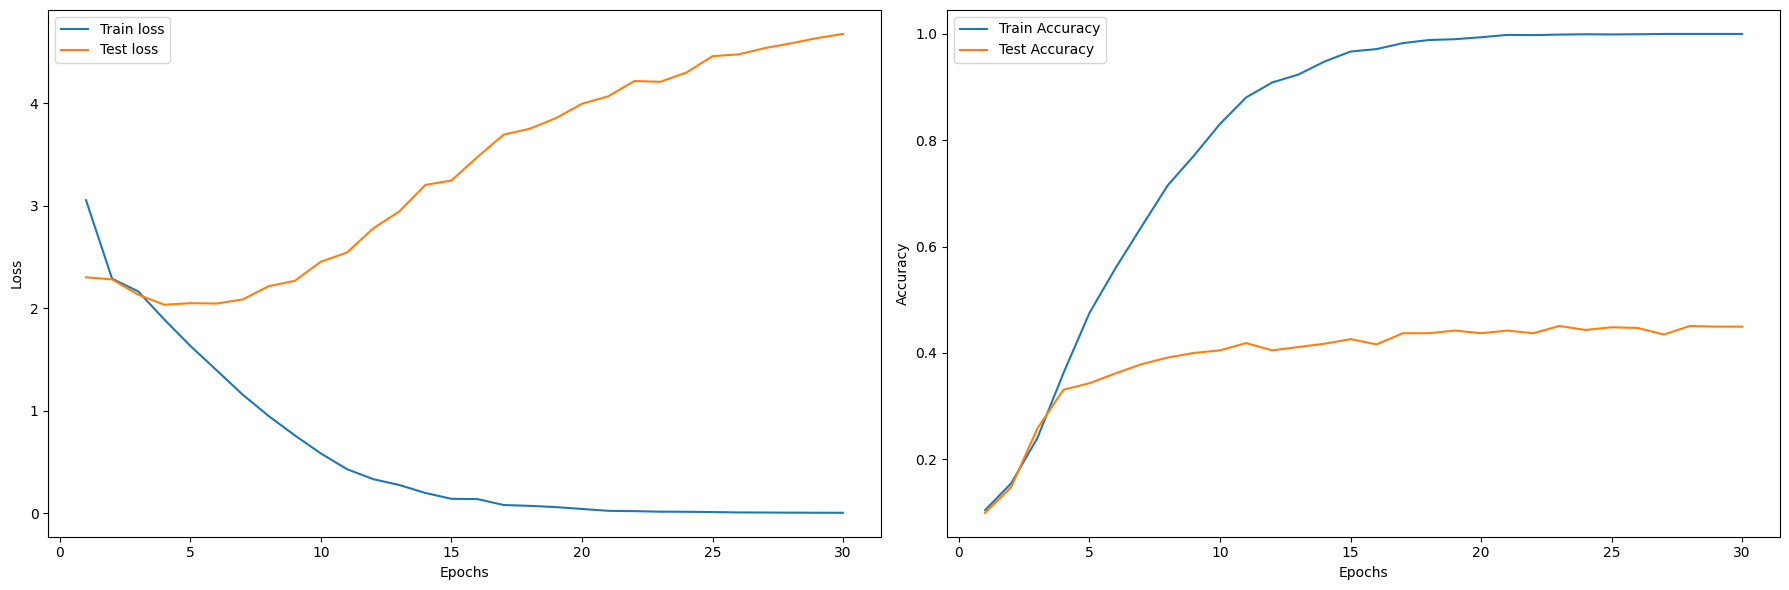

In [40]:
def plot_training_history(history_dict):
    num_epochs = range(1, len(history_dict['train_loss']) + 1)

    plt.figure(figsize=(18, 6))

    # Plot train/test loss
    plt.subplot(1, 2, 1)
    plt.plot(num_epochs, history_dict['train_loss'], label='Train loss')
    plt.plot(num_epochs, history_dict['test_loss'], label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot train/test accuracy
    plt.subplot(1, 2, 2)
    plt.plot(num_epochs, history_dict['train_accuracy'], label='Train Accuracy')
    plt.plot(num_epochs, history_dict['test_accuracy'], label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


if all(len(history[k]) == len(history['train_loss']) for k in history):
    plot_training_history(history)
else:
    print("Inconsistent training history lengths.")


In [41]:
# Generate Classification Report for Test Set
print("Generating Classification Report for Test Set...")

# Get predictions for the entire test set
model.eval()
all_predictions = []
all_true_labels = []

with torch.no_grad():
    # Process test data in batches to avoid memory issues
    for i in range(0, len(test_images), BATCH_SIZE):
        batch_images = test_images[i:i+BATCH_SIZE]
        batch_labels = test_labels[i:i+BATCH_SIZE]
        
        outputs = model(batch_images)
        predictions = outputs.argmax(dim=1)
        
        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(batch_labels.cpu().numpy())

# Generate classification report
print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(all_true_labels, all_predictions, 
                          target_names=[f'Digit {i}' for i in range(10)],
                          digits=4))

# Generate confusion matrix
print("\n" + "="*60)
print("CONFUSION MATRIX")
print("="*60)
conf_matrix = confusion_matrix(all_true_labels, all_predictions)
print(conf_matrix)

# Calculate per-class accuracy
print("\n" + "="*60)
print("PER-CLASS ACCURACY")
print("="*60)
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
for i, acc in enumerate(class_accuracy):
    print(f"Digit {i}: {acc:.4f} ({acc*100:.2f}%)")

print(f"\nOverall Test Accuracy: {sum(all_predictions == np.array(all_true_labels)) / len(all_true_labels):.4f}")

Generating Classification Report for Test Set...

CLASSIFICATION REPORT
              precision    recall  f1-score   support

     Digit 0     0.5368    0.6375    0.5829        80
     Digit 1     0.4405    0.4405    0.4405        84
     Digit 2     0.4810    0.4578    0.4691        83
     Digit 3     0.4321    0.4268    0.4294        82
     Digit 4     0.3763    0.4217    0.3977        83
     Digit 5     0.4405    0.4744    0.4568        78
     Digit 6     0.4769    0.3924    0.4306        79
     Digit 7     0.5068    0.4625    0.4837        80
     Digit 8     0.3733    0.3544    0.3636        79
     Digit 9     0.4304    0.4250    0.4277        80

    accuracy                         0.4493       808
   macro avg     0.4495    0.4493    0.4482       808
weighted avg     0.4493    0.4493    0.4481       808


CONFUSION MATRIX
[[51  2  1  5  0  1  7  0  6  7]
 [ 1 37  7  5 15  0  8  3  4  4]
 [ 6  6 38  5  5  5  2  6  6  4]
 [ 4  0  4 35  4 18  2  5  6  4]
 [ 6 16  5  4 35  0

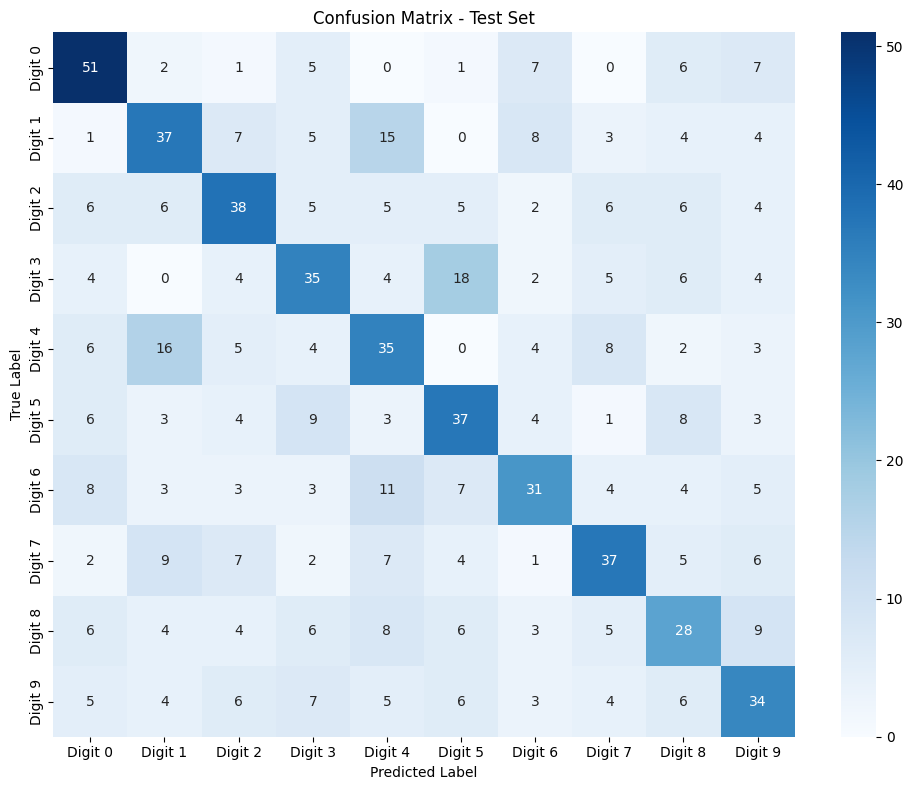


Weighted Average Metrics:
Precision: 0.4493
Recall: 0.4493
F1-Score: 0.4481

Macro Average Metrics:
Precision: 0.4495
Recall: 0.4493
F1-Score: 0.4482


In [42]:
# Visualize Confusion Matrix
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Digit {i}' for i in range(10)],
            yticklabels=[f'Digit {i}' for i in range(10)])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Calculate and display additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(all_true_labels, all_predictions, average='weighted')
recall = recall_score(all_true_labels, all_predictions, average='weighted')
f1 = f1_score(all_true_labels, all_predictions, average='weighted')

print(f"\nWeighted Average Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Macro average metrics
precision_macro = precision_score(all_true_labels, all_predictions, average='macro')
recall_macro = recall_score(all_true_labels, all_predictions, average='macro')
f1_macro = f1_score(all_true_labels, all_predictions, average='macro')

print(f"\nMacro Average Metrics:")
print(f"Precision: {precision_macro:.4f}")
print(f"Recall: {recall_macro:.4f}")
print(f"F1-Score: {f1_macro:.4f}")

In [43]:

small_test_dataset = '/kaggle/input/2k-dataset'

jpg_list = []
total_list = []
jpg_png_list = []

none_counts = 0

counts = 0
img_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(IMAGE_SIZE), 
    transforms.ToTensor(), 
    # transforms.Normalize([0.485, 0.456, 0.406],  
    #                      [0.229, 0.224, 0.225])
])

for image_path in os.listdir(small_test_dataset):
    full_path = os.path.join(small_test_dataset, image_path)
    image = cv.imread(full_path)
    if image is None: 
        print(f'Image is None: {image_path}')
        none_counts += 1
        continue
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    
    image_tensor = img_transform(image)
    image_tensor = image_tensor.unsqueeze(0)
    image_tensor = image_tensor.to(DEVICE)

    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        pred = output.argmax(dim=1).item()

    if os.path.splitext(image_path)[1] == '.jpg':
        jpg_list.append([image_path, pred])
    if os.path.splitext(image_path)[1] == '.jpg' or os.path.splitext(image_path)[1] == '.png' or os.path.splitext(image_path)[1] == '.PNG' or os.path.splitext(image_path)[1] == '.jpeg' or os.path.splitext(image_path)[1] == '.JPG' or os.path.splitext(image_path)[1] == '.JPEG':
    
        jpg_png_list.append([image_path, pred])

    total_list.append([image_path, pred])
    counts += 1


print(f"Predicted {counts} images")
print(f"There are {none_counts} none-images")
    
    
    

Image is None: e3aab03293995eaca8c3d24b9615dd8e  -.HEIC
Image is None: 7ea219e24662f79b3beb31c8f6985d55  -.md
Image is None: dbb7bae06ac5acffe3c8912675c4bc14  -.md
Image is None: 3edc952b8034e0d91262887e6480a14d  -.HEIC
Image is None: e4f8ff42377664f204b76962bf774924  -.md
Image is None: 4125170c9b33affe28532d84097fef4a  -.HEIC
Image is None: 616172becdffb344ed0eaf6589f9b320  -.HEIC
Image is None: 379e725180d1877eee670939084c0361  -.HEIC
Image is None: 8627553fc3ae84da85df6ee275ba7a3c  -.HEIC
Image is None: f335ebd8f31b916c71ddd182bf2f2e40  -.HEIC
Image is None: 415b40d1bc1d46f4dd4010be6a8fc617  -.md
Image is None: 2cc4b987bfe65eb3beda9870d3dd5571  -.HEIC
Image is None: d67a99873641d73fffd0498ce135dec9  -.HEIC
Image is None: d79199e680f3053778b53532d4bc7fa4  -.md
Image is None: c6ce9f623fc4dd820f40fad5f541c87e  -.HEIC
Image is None: faff9da17885d6589a9775ccdecb8b7d  -.HEIC
Image is None: cbc4dc5a5e02031c9970b4ffc5112be4  -.md
Image is None: 8e4a38bd19c94970f342494bb01213d8  -.HEIC
Imag

In [44]:
for path, pred in jpg_png_list[:]:
    print(f"{path},{pred}")

389269258327f495063eeb7863aeb323  -.jpg,6
f5f0bb5e86e665c55db37b9a4b9f2d9b  -.png,0
d26a4cc2f9228f2f28d578a357eaf399  -.png,0
7dec839f7f31f27b475f074cfd042ee2  -.jpg,1
bf8c40312d875c69f51c17b450ee8594  -.png,9
f3080fa356040ce51729f224d9fd3005  -.png,8
295ba397a88b019ab1c52e5db36ef980  -.png,1
d527ba285958663784a2df385cf13ee5  -.jpg,5
a4af5997c7c1bfe1b422d0ffff405e33  -.jpg,9
bcfdd1accaa70938c1856f190a98460e  -.jpg,9
56641937f0c93e1cbe492ac606971cfc  -.jpg,5
84ef89c20eee0de38ea12f55e40fef39  -.png,5
3ab96d130e830d32a533c2defdbd3c25  -.jpg,7
b2add062852915850023d8e53ec4c281  -.JPG,8
f9052993342bab622e01b25d4308814c  -.png,7
7ddb1ad8518a21ae7f117c22bcc025cb  -.png,9
c769146d118200002c32c97462a84973  -.jpg,2
793d858201d4f18db83b5caca2676e06  -.jpg,7
db26d8f7bf453eb15e0db1482e348162  -.jpg,3
386d8f97f1f16f52694733ca1858e61d  -.JPG,9
1dbcad08ff65954f5fc5af2d78823514  -.jpg,1
d4837a903870674fdcb04becd805f23b  -.jpg,9
7e701b196e479b39fb64357028932221  -.jpg,9
1181b06d89825c2fae783deab23898e6  

In [45]:

large_test_dataset = '/kaggle/input/10k-image-dataset'


large_jpg_png_list = []
none_large_count = 0

counts = 0
img_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(IMAGE_SIZE), 
    transforms.ToTensor(), 
    # transforms.Normalize([0.485, 0.456, 0.406],  
    #                      [0.229, 0.224, 0.225])
])

for image_path in os.listdir(large_test_dataset):
    full_path = os.path.join(large_test_dataset, image_path)
    image = cv.imread(full_path)
    if image is None: 
        print(f'Image is None: {image_path}')
        continue
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    
    image_tensor = img_transform(image)
    image_tensor = image_tensor.unsqueeze(0)
    image_tensor = image_tensor.to(DEVICE)

    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        pred = output.argmax(dim=1).item()

    if os.path.splitext(image_path)[1] == '.jpg' or os.path.splitext(image_path)[1] == '.png' or os.path.splitext(image_path)[1] == '.PNG' or os.path.splitext(image_path)[1] == '.jpeg' or os.path.splitext(image_path)[1] == '.JPG' or os.path.splitext(image_path)[1] == '.JPEG':
    
        large_jpg_png_list.append([image_path, pred])

    total_list.append([image_path, pred])
    counts += 1


print(f"Predicted {counts} images")
print(f"There are {none_large_counts} none-images")
    
    
    

Image is None: 004d39d8a48b484ba47ac058af0307d2.HEIC
Image is None: 357162d6587502bc71c8c568d24fa894.HEIC
Image is None: 97397cc0b77329eae661764697469b2e.HEIC
Image is None: 614a8c12dd3771cedcabcdb3642ba95b.HEIC
Image is None: e3aab03293995eaca8c3d24b9615dd8e  -.HEIC
Image is None: 687f1d529d89358dab5f0c852cde3ca7.HEIC
Image is None: 34dff8cda52938e0ba5af071f116e88c.HEIC
Image is None: d3d5000ba81d41e3db2659637beaed0b.HEIC
Image is None: 7ea219e24662f79b3beb31c8f6985d55  -.md
Image is None: a22b9f14ea1e93e6a8771e71757679d7.HEIC
Image is None: 064e9f0be1e982a8f64ad6410df288c7.HEIC
Image is None: dbb7bae06ac5acffe3c8912675c4bc14  -.md
Image is None: 3edc952b8034e0d91262887e6480a14d  -.HEIC
Image is None: 83177a8abb6ce6713485e253ed7eec55.HEIC
Image is None: e4f8ff42377664f204b76962bf774924  -.md
Image is None: 4125170c9b33affe28532d84097fef4a  -.HEIC
Image is None: d48f421b5f1964b3590076e9a35db2fe.HEIC
Image is None: ea5baef8b76af40d854a8d330f96dff5.HEIC
Image is None: 057efebffefd1027b89

NameError: name 'none_large_counts' is not defined

In [46]:
for path, pred in large_jpg_png_list[:]:
    print(f"{path},{pred}")

167144297687438af7bff077e768440c.jpg,9
aaf8c6bebe14ae51b9cb4bd7d58d90fb.png,6
9aaea8f3565153a10f48833fe2c501d0.jpeg,1
5d99c656fa82ce43b6e979175a53444a.jpg,3
c9c1a54628461a5469f2661b2ee73a5b.jpg,7
8500d944dc278eb672593860543b6726.jpg,5
819beec566fe42c08c91b0ec14b6fde4.jpg,7
65c477afed1657556acb5203acbe0746.jpg,4
389269258327f495063eeb7863aeb323  -.jpg,6
f5f0bb5e86e665c55db37b9a4b9f2d9b  -.png,0
5304916d0c7a982c53ae25ca24d97a4a.jpg,1
70ef871c91ee732ba5d10e2b990ad9bc.jpg,2
27d90143b65ac4d99d0a32004ea0a526.jpg,1
5afd5348d1063c32d9a4230b10828894.png,3
f835a3000c6c6890dc0c8c47535f9811.jpg,1
1d255cd172a81e91a591932b6882db4a.JPG,3
506d65aceabb4db5b8ebb307be42b103.png,5
b7ef500469e3ab89d3dc9b51cfe1c0eb.JPG,7
045c1743f7ba3c0c72e61210760bb09f.jpg,7
d26a4cc2f9228f2f28d578a357eaf399  -.png,0
7dec839f7f31f27b475f074cfd042ee2  -.jpg,1
2408ddcf383be63a6d3782f431829d40.PNG,1
381c86125d8dc7da2b9170ec49aecb67.png,0
b2121cb5126cbbe206bb7fd4ae3f6ec9.jpg,7
bf8c40312d875c69f51c17b450ee8594  -.png,9
8491243d3